In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
import scipy.signal
from scipy.signal import correlate

import requests
from sklearn.cluster import KMeans
from PIL import Image
from io import BytesIO
from google.colab.patches import cv2_imshow

# **Q2** Magnitude and Pase Spectra of Images

In [ ]:
cameraman = skimage.io.imread('cameraman 1.tif') / 255.0
barbara = skimage.io.imread('barbara.tif') / 255.0
barbara = cv2.resize(barbara, (256,256))

In [ ]:
def dft2d(image):
    return np.fft.fftshift(np.fft.fft2(image))

In [ ]:
def idft2d(dft_result):
    return np.fft.ifft2(np.fft.ifftshift(dft_result))

In [ ]:
dft_cameraman = dft2d(cameraman)
dft_barbara = dft2d(barbara)

In [ ]:
# Check 1

print(f'LHS = {np.sum(cameraman * np.conjugate(barbara)) : .3f}')
print(f'RHS = {np.abs(np.sum(dft_cameraman * np.conjugate(dft_barbara)))/ np.prod(np.shape(cameraman)) : .3f}')

LHS =  14062.126
RHS =  14062.126


In [ ]:
# Parseval's Theorem Check

print('For Cameraman image')
print(f'LHS = {np.sum(cameraman * np.conjugate(cameraman)) : .3f}')
print(f'RHS = {np.abs(np.sum(dft_cameraman * np.conjugate(dft_cameraman)))/ np.prod(np.shape(cameraman)) : .3f}')


print('\nFor Barbara image')
print(f'LHS = {np.sum(barbara * np.conjugate(barbara)) : .3f}')
print(f'RHS = {np.abs(np.sum(dft_barbara * np.conjugate(dft_barbara)))/ np.prod(np.shape(barbara)) : .3f}')

For Cameraman image
LHS =  18123.245
RHS =  18123.245

For Barbara image
LHS =  16706.449
RHS =  16706.449


In [ ]:
new_image_1_dft = np.zeros_like(cameraman, dtype = 'complex')
new_image_2_dft = np.zeros_like(cameraman, dtype = 'complex')

new_image_1_dft.real = np.abs(dft_cameraman) * np.cos(np.angle(dft_barbara))
new_image_2_dft.real = np.abs(dft_barbara) * np.cos(np.angle(dft_cameraman))

new_image_1_dft.imag = np.abs(dft_cameraman) * np.sin(np.angle(dft_barbara))
new_image_2_dft.imag = np.abs(dft_barbara) * np.sin(np.angle(dft_cameraman))

new_image_1 = idft2d(new_image_1_dft).real
new_image_2 = idft2d(new_image_2_dft).real

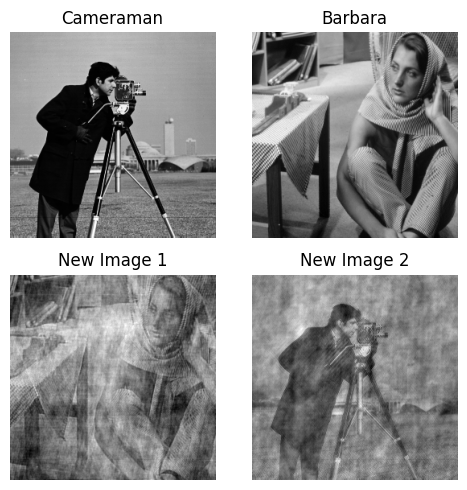

In [ ]:
# Plot the images
plt.figure(figsize=(5, 5))

# Original images
plt.subplot(2, 2, 1)
plt.imshow(cameraman, cmap='gray')
plt.title('Cameraman')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(barbara, cmap='gray')
plt.title('Barbara')
plt.axis('off')

# New images
plt.subplot(2, 2, 3)
plt.imshow(new_image_1, cmap='gray')
plt.title('New Image 1')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(new_image_2, cmap='gray')
plt.title('New Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()
